In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Location1.csv")

In [ ]:
data

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793
...,...,...,...,...,...,...,...,...,...,...
43795,2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,0.1796
43796,2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,0.2066
43797,2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,0.2336
43798,2021-12-31 22:00:00,34.4,96,33.5,2.40,4.62,45,51,4.2,0.2606


In [ ]:
data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [ ]:
data = data.drop("Time",axis=1)

In [ ]:
data = data.drop("windspeed_100m",axis=1)

In [ ]:
data = data.drop("winddirection_100m",axis=1)

In [ ]:
data.isnull().sum()

temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
winddirection_10m      0
windgusts_10m          0
Power                  0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
winddirection_10m      0
windgusts_10m          0
Power                  0
dtype: int64

In [ ]:
data

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,winddirection_10m,windgusts_10m,Power
0,28.5,85,24.5,1.44,146,1.4,0.1635
1,28.4,86,24.7,2.06,151,4.4,0.1424
2,26.8,91,24.5,1.30,148,3.2,0.1214
3,27.4,88,24.3,1.30,58,1.6,0.1003
4,27.3,88,24.1,2.47,58,4.0,0.0793
...,...,...,...,...,...,...,...
43795,34.1,94,32.5,1.00,53,2.5,0.1796
43796,34.8,94,33.4,2.52,56,4.8,0.2066
43797,34.1,95,33.0,1.10,360,4.3,0.2336
43798,34.4,96,33.5,2.40,45,4.2,0.2606


<ipython-input-66-adc8279d8e80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(climate_data["Power"])


<Axes: xlabel='Power', ylabel='Density'>

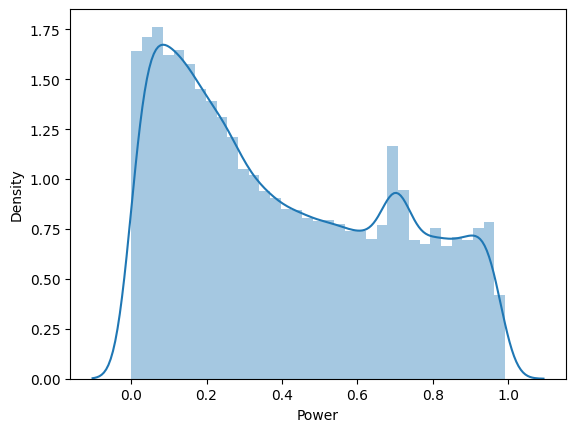

In [ ]:
sbn.distplot(data["Power"])

In [ ]:
y = data["Power"].values
x = data.drop("Power",axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(5,activation = "relu"))
model.add(Dense(5,activation = "relu"))
model.add(Dense(5,activation = "relu"))
model.add(Dense(5,activation = "relu"))
model.add(Dense(5,activation = "relu"))
model.add(Dense(5,activation = "relu"))


model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [ ]:
model.fit(x= x_train,y= y_train,validation_data=(x_test,y_test),batch_size=16,epochs=200)

Epoch 1/200
1835/1835 [==============================] - 4s 2ms/step - loss: 0.0471 - val_loss: 0.0346
Epoch 2/200
1835/1835 [==============================] - 4s 2ms/step - loss: 0.0349 - val_loss: 0.0340
Epoch 3/200
1835/1835 [==============================] - 3s 2ms/step - loss: 0.0343 - val_loss: 0.0335
Epoch 4/200
1835/1835 [==============================] - 4s 2ms/step - loss: 0.0340 - val_loss: 0.0330
Epoch 5/200
1835/1835 [==============================] - 3s 2ms/step - loss: 0.0338 - val_loss: 0.0329
Epoch 6/200
1835/1835 [==============================] - 3s 2ms/step - loss: 0.0337 - val_loss: 0.0333
Epoch 7/200
1835/1835 [==============================] - 4s 2ms/step - loss: 0.0336 - val_loss: 0.0327
Epoch 8/200
1835/1835 [==============================] - 3s 2ms/step - loss: 0.0335 - val_loss: 0.0329
Epoch 9/200
1835/1835 [==============================] - 3s 2ms/step - loss: 0.0334 - val_loss: 0.0332
Epoch 10/200
1835/1835 [==============================] - 3s 2ms/step - l

In [ ]:
veri = model.history.history

<Axes: >

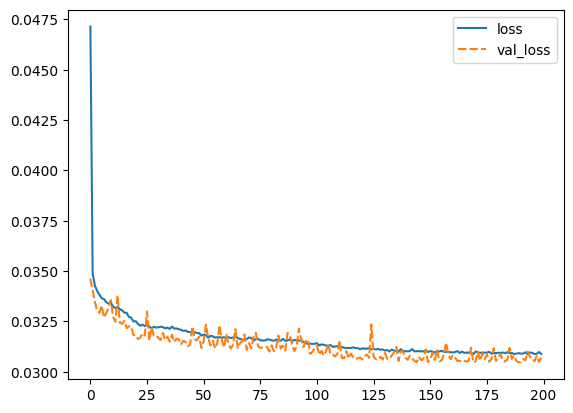

In [ ]:
sbn.lineplot(veri)

In [ ]:
from tensorflow.keras.metrics import mean_absolute_error,mean_squared_error

In [ ]:
tahminDizisi = model.predict(x_test)

452/452 [==============================] - 0s 838us/step


In [ ]:
tahminDizisi.shape

(14454, 1)

In [ ]:
#tahminDizisi = pd.Series(tahminDizisi.reshape(102,))

In [ ]:
mean_absolute_error(y_test,tahminDizisi)

<tf.Tensor: shape=(14454,), dtype=float32, numpy=
array([0.25928113, 0.25011465, 0.3140862 , ..., 0.29643142, 0.25497946,
       0.2937807 ], dtype=float32)>

In [ ]:
mean_squared_error(y_test,tahminDizisi)

<tf.Tensor: shape=(14454,), dtype=float32, numpy=
array([0.10854889, 0.08422917, 0.16866662, ..., 0.15135647, 0.08379965,
       0.14864871], dtype=float32)>

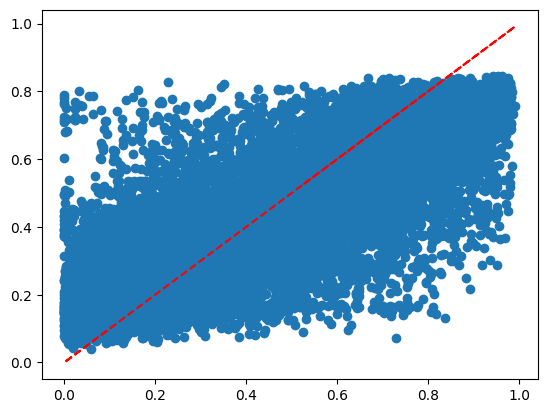

In [ ]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"r--")

In [ ]:
data_set = [[27.4,88,24.3,1.3,58,1.6]]

In [ ]:
data_set = scaler.transform(data_set)

In [ ]:
data.iloc[3]

temperature_2m         27.4000
relativehumidity_2m    88.0000
dewpoint_2m            24.3000
windspeed_10m           1.3000
winddirection_10m      58.0000
windgusts_10m           1.6000
Power                   0.1003
Name: 3, dtype: float64

In [ ]:
model.predict(data_set)

1/1 [==============================] - 0s 26ms/step


array([[0.1549829]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("windPower.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
sonModel = load_model("windPower.h5")

In [ ]:
sonModel.predict(data_set)

1/1 [==============================] - 0s 57ms/step


array([[0.1549829]], dtype=float32)

In [ ]:
wind = [[27.4,88,24.3,1.3,58,1.6]]

In [ ]:
wind = scaler.transform(wind)

In [ ]:
sonModel.predict(wind)

1/1 [==============================] - 0s 15ms/step


array([[0.1549829]], dtype=float32)